#### Objectives: 

- Exploring features or characteristics to predict price of car
- Analyzing patterns and run descriptive statistical analysis
- Grouping data based on identified parameters and create pivot tables
- Identifying the effect of independent attributes on price of cars

In [760]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [761]:
df = pd.read_csv("usedcars.csv")

In [762]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Analyzing Individual Feature Patterns Using Visualization

What is the data type of the column "peak-rpm"?

In [763]:
df['peak-rpm'].dtypes

dtype('float64')

Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [764]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


#### Positive Linear Relationship 

Find the scatterplot of "engine-size" and "price".

(0.0, 53666.14163539521)

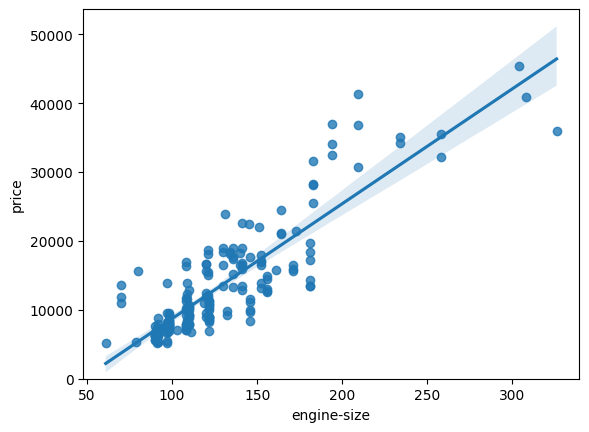

In [765]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

 Examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

In [766]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

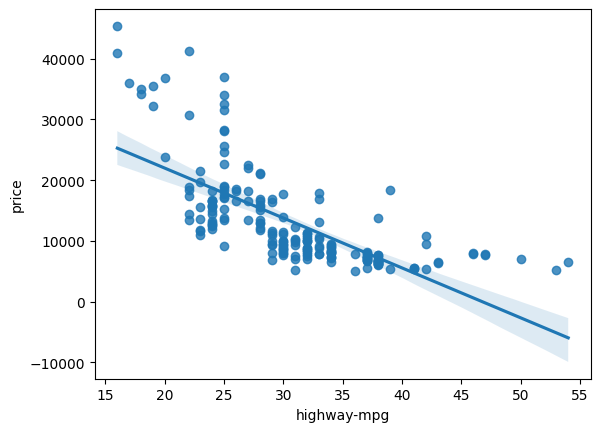

In [767]:
sns.regplot(x="highway-mpg", y="price", data=df)

Examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

In [768]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### Weak Linear Relationship

Find the scatterplot of "peak-rpm" and "price".

<Axes: xlabel='peak-rpm', ylabel='price'>

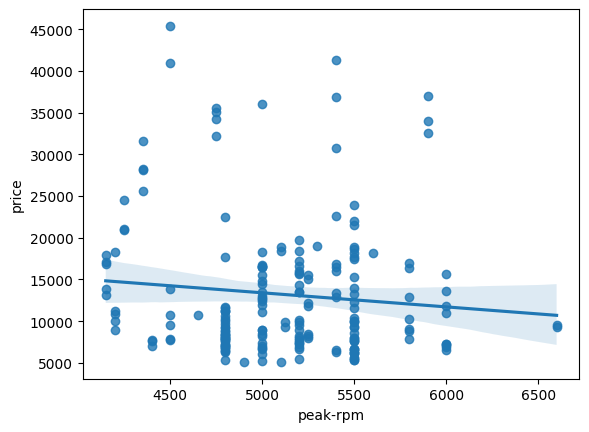

In [769]:
sns.regplot(x="peak-rpm", y="price", data=df)

Examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.

In [770]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Find the correlation between x="stroke" and y="price".

In [771]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Given the correlation results between "price" and "stroke", can we expect a linear relationship?

<Axes: xlabel='stroke', ylabel='price'>

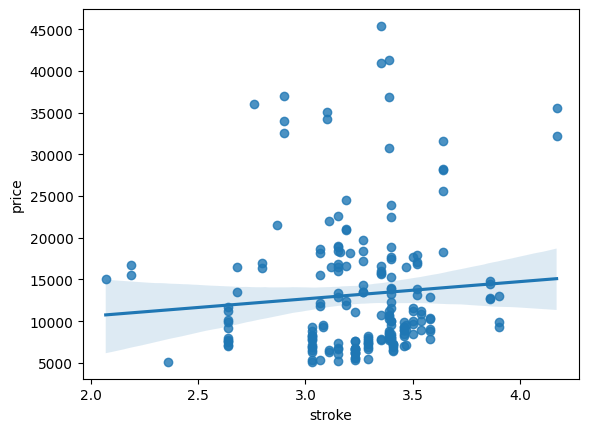

In [772]:
sns.regplot(x="stroke",y="price",data=df) 

##### Categorical Variables:
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.


Let's look at the relationship between "body-style" and "price".

<Axes: xlabel='body-style', ylabel='price'>

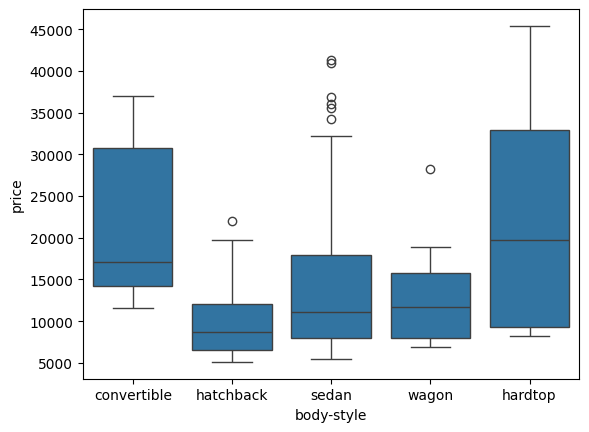

In [773]:
sns.boxplot(x="body-style", y="price", data=df)

Examine engine "engine-location" and "price"

<Axes: xlabel='engine-location', ylabel='price'>

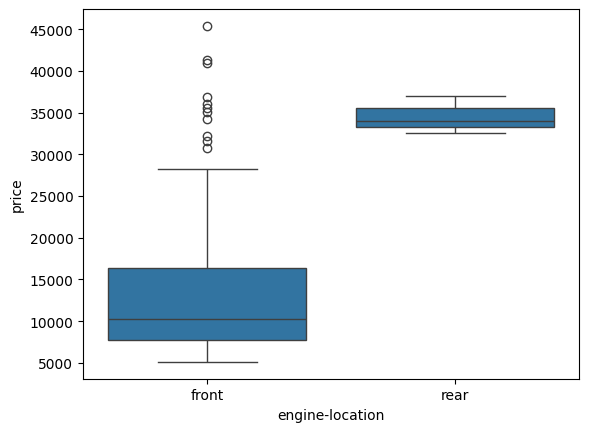

In [774]:
sns.boxplot(x="engine-location", y="price", data=df)

Examine "drive-wheels" and "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

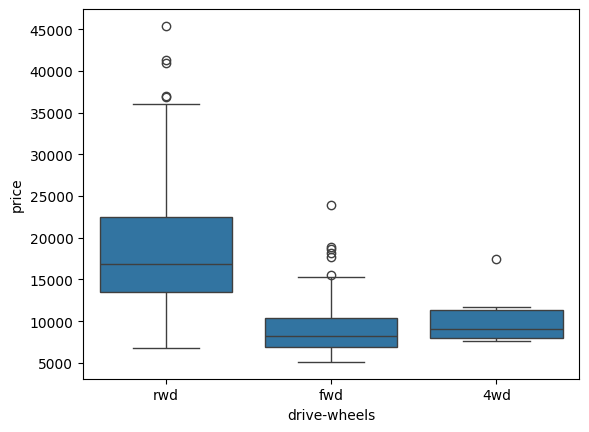

In [775]:
sns.boxplot(x="drive-wheels", y="price", data=df)

#### Descriptive Statistical Analysis

describe-
 The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

the count of that variable <br>
the mean <br>
the standard deviation (std) <br>
the minimum value <br>
the IQR (Interquartile Range: 25%, 50% and 75%) <br>
the maximum value <br>

In [776]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [777]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


value counts-
 Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [778]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

We can convert the series to a dataframe as follows:

In [779]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [780]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.reset_index(inplace=True)
drive_wheels_counts=drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'})
drive_wheels_counts

,value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


In [781]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


In [782]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


#### Basics of Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [783]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [784]:
df_group_one = df[['drive-wheels','body-style','price']]

In [785]:
# grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [786]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [787]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [788]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Use the "groupby" function to find the average "price" of each car based on "body-style".

In [789]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Variables: Drive Wheels and Body Style vs. Price

Let's use a heat map to visualize the relationship between Body Style vs Price.

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

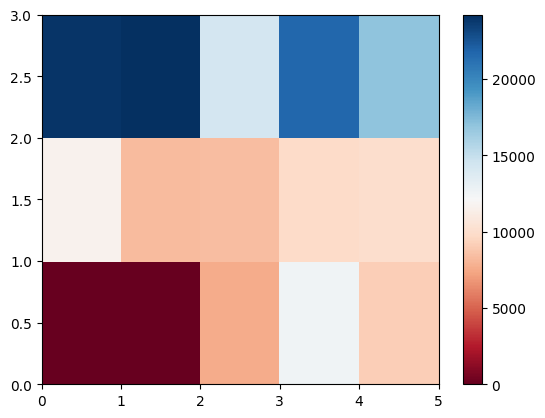

In [790]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

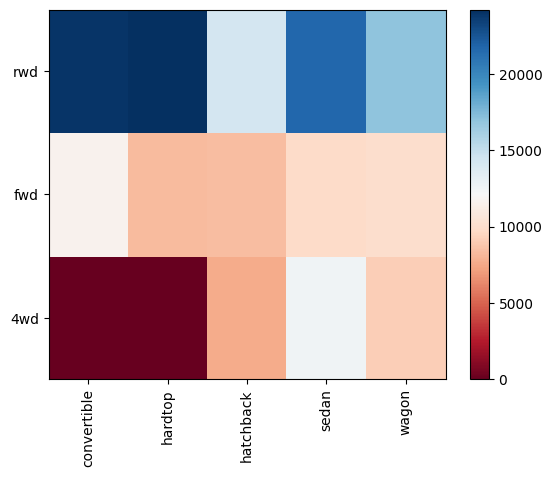

In [791]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### Correlation and Causation
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation-
The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.<br>
0: No linear correlation, the two variables most likely do not affect each other.<br>
-1: Perfect negative linear correlation.<br>

Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [792]:
from scipy import stats

Wheel-Base vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [793]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732847e-20


Conclusion:
Since the p-value is 
 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

Horsepower vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [794]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259638e-48


Conclusion:
Since the p-value is 
 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

Length vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [795]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158899e-30


Conclusion:
Since the p-value is 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

Engine-Size vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [796]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.26549162219869e-64


Conclusion:
Since the p-value is 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

Highway-mpg vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'Highway-mpg' and 'price':

In [797]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476634e-31


Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

### In Conclusion: 
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

###### Continuous numerical variables:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

###### Categorical variables:

- Drive-wheels

THANK YOU IBM for this perfect lab assignment through which I now understand the concepts of :
- Analyzing patterns and running descriptive statistical analysis
- Grouping data based on identified parameters and creating pivot tables
- Identifying the effect of independent attributes on price of cars

### AUTHOR
~Dimple Mundhra